* This technique normalizes the inputs of current batch before feeding to the next layer.
* mean activation of data around zero
* standard daviation around one
* model genralize faster & train better

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

170500096/170498071 [==============================] - 126s 1us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [5]:

plt.imshow(X_train[0])

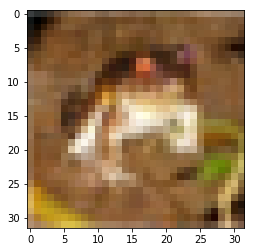

In [6]:
plt.show()

In [10]:
y_train[0]

array([6], dtype=uint8)

In [11]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [12]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)

In [13]:
input_shape = X_train[0].shape

In [14]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5, verbose=1)]

In [15]:
batch_size = 256
n_epochs = 30

In [16]:
model_bn = Sequential()

In [17]:
model_bn.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())

In [18]:
model_bn.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())

In [19]:
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())

In [20]:
model_bn.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

In [21]:
model_bn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())

model_bn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

In [22]:
model_bn.add(Flatten())
model_bn.add(Dense(512, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.5))
model_bn.add(Dense(128, activation='relu'))
model_bn.add(Dense(n_classes, activation='softmax'))

In [24]:
model_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [25]:
history_bn = model_bn.fit(X_train, y_train,
        batch_size=batch_size,
        epochs=n_epochs,
        verbose=1,
        validation_data=(X_val, y_val), callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
28160/50000 [===============>..............] - ETA: 35:36 - loss: 1.8239 - acc: 0.3780

KeyboardInterrupt: 

<img src="https://www.safaribooksonline.com/library/view/python-deep-learning/9781787125193/assets/d78bb1eb-b7e4-4893-8ca8-d7d55b53d73f.png">